# Importing Libraries

In [2]:
import numpy as np  # Importing NumPy for numerical operations
import pandas as pd  # Importing pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing Matplotlib for data visualization
import seaborn as sns  # Importing Seaborn for enhanced visualizations

from sklearn.model_selection import train_test_split  # Splitting dataset into training and testing sets
from sklearn.ensemble import RandomForestRegressor  # Importing RandomForestRegressor for regression tasks
from sklearn import metrics  # Importing metrics to evaluate the model's performance

# Loading the CSV file

In [4]:
df = pd.read_csv('gld_price_data.csv')  # Reads the dataset from a CSV file

In [5]:
# print first 5 rows in the dataframe
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
# print last 5 rows of the dataframe
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
# number of rows and columns
df.shape

(2290, 6)

In [8]:
# getting some basic informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# checking the number of missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
# getting the statistical measures of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
# Convert the 'Date' column to datetime format, setting invalid parsing to NaT (if any)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'] 

0      2008-01-02
1      2008-01-03
2      2008-01-04
3      2008-01-07
4      2008-01-08
          ...    
2285   2018-05-08
2286   2018-05-09
2287   2018-05-10
2288   2018-05-14
2289   2018-05-16
Name: Date, Length: 2290, dtype: datetime64[ns]

In [12]:
# Calculate the correlation matrix for numerical columns in the dataset  
correlation = df.corr()

In [13]:
correlation

,Date,SPX,GLD,USO,SLV,EUR/USD
Date,1.000000,0.944033,0.209118,-0.782230,-0.174108,-0.794540
SPX,0.944033,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.209118,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.782230,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.174108,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.794540,-0.672017,-0.024375,0.829317,0.321631,1.000000


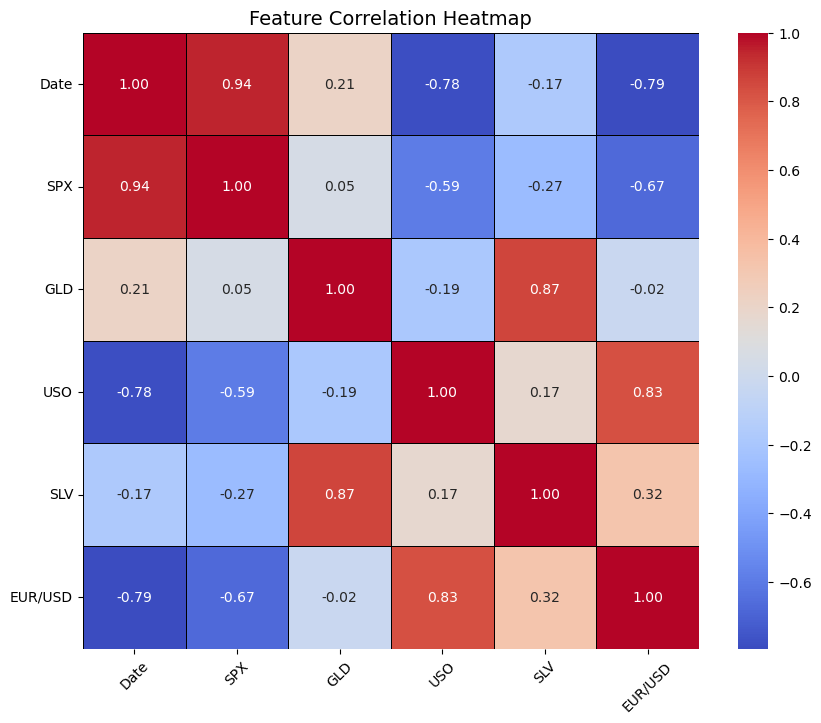

In [14]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(10, 8))  # Adjust figure size for better readability
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='coolwarm', linewidths=0.5, linecolor='black')  # Enhancing heatmap with better visualization
plt.title('Feature Correlation Heatmap', fontsize=14)  # Adding a title to the heatmap
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.yticks(rotation=0)  # Keeping y-axis labels horizontal
plt.show()  # Displaying the heatmap

In [15]:
# correlation values of GLD
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


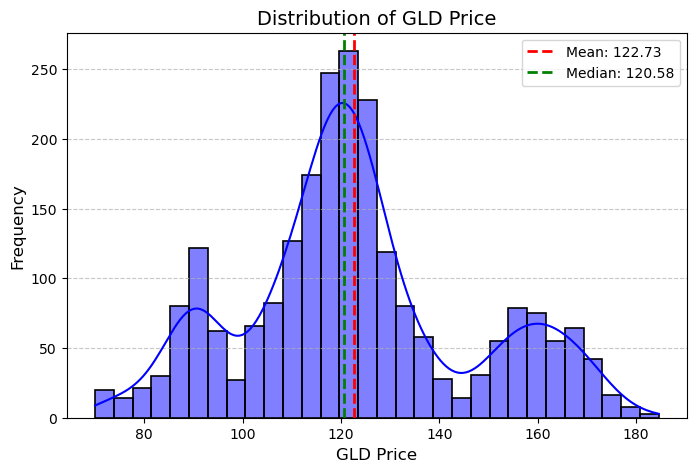

In [16]:
# Checking the distribution of the GLD Price
plt.figure(figsize=(8, 5))  # Adjust figure size for better visualization
sns.histplot(df['GLD'], bins=30, kde=True, color='blue', edgecolor='black', linewidth=1.2)  # Using histplot with KDE for a smooth distribution curve
plt.axvline(df['GLD'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {df["GLD"].mean():.2f}')  # Adding mean line
plt.axvline(df['GLD'].median(), color='green', linestyle='dashed', linewidth=2, label=f'Median: {df["GLD"].median():.2f}')  # Adding median line
plt.title('Distribution of GLD Price', fontsize=14)  # Adding title
plt.xlabel('GLD Price', fontsize=12)  # X-axis label
plt.ylabel('Frequency', fontsize=12)  # Y-axis label
plt.legend()  # Show legend
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding a light grid for better readability
plt.show()  # Displaying the plot

# Splitting the dataset into features (X) and target variable (y)

In [18]:
X = df.drop(['Date', 'GLD'], axis=1)  # Dropping Date and GLD columns to keep only feature variables
y = df['GLD']  # Target variable (Gold Price)

In [19]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [20]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [21]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=2)  # 80% training, 20% testing
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1832, 4), (458, 4), (1832,), (458,))

In [22]:
X_train

,SPX,USO,SLV,EUR/USD
476,1138.500000,39.790001,16.889999,1.361693
1958,2202.939941,10.630000,15.800000,1.063886
248,700.820007,24.480000,12.770000,1.256408
2231,2656.000000,11.890000,15.570000,1.225280
1325,1838.880005,33.040001,19.420000,1.366998
...,...,...,...,...
1071,1409.150024,32.320000,32.980000,1.287515
433,1132.989990,40.270000,17.230000,1.442398
674,1286.119995,38.610001,27.389999,1.357276
1099,1461.890015,33.919998,29.180000,1.306745


In [23]:
y_test

903     168.020004
129      81.230003
1787    112.320000
1913    127.589996
2048    119.620003
           ...    
923     166.380005
1693    106.379997
2054    122.239998
658     133.830002
376     102.360001
Name: GLD, Length: 458, dtype: float64

In [24]:
# Initializing the Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Creating the model with 100 trees and setting a fixed random state for reproducibility
rf  # Displaying the model configuration

RandomForestRegressor(random_state=42)

In [25]:
# training the model
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [26]:
# Prediction on Test Data
test_data_prediction = rf.predict(X_test)  # Making predictions on the test dataset
test_data_prediction  # Displaying the predicted values

array([168.63349946,  82.02709975, 116.08049972, 127.65620068,
       120.7691009 , 154.80039729, 150.5410983 , 126.21100015,
       117.36519882, 126.01010069, 116.53350131, 172.2066008 ,
       141.56769839, 167.79659876, 115.11799989, 117.38140041,
       137.96700273, 170.14770114, 159.01680217, 157.20809863,
       155.15530024, 125.67850031, 175.70449917, 157.21900346,
       125.24500021,  94.0334996 ,  77.76799986, 120.42629991,
       119.17099966, 167.39360017,  88.1694005 , 125.3282    ,
        91.33570078, 117.69709988, 121.05769906, 136.20560097,
       115.4369013 , 115.22910072, 147.15919893, 107.45430086,
       104.55980245,  87.30389785, 126.44940044, 118.16020018,
       154.01629898, 119.57100007, 108.25910045, 107.99379812,
        93.08490019, 127.01759796,  74.61670067, 113.76209947,
       121.33350028, 111.23139901, 118.87289907, 121.0557994 ,
       158.82800087, 169.01580109, 147.11659745,  85.78329853,
        94.33990046,  86.94539902,  90.42880025, 119.04

In [27]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.988702488354275


In [28]:
y_test = list(y_test)
y_test

[168.020004,
 81.230003,
 112.32,
 127.589996,
 119.620003,
 154.210007,
 148.910004,
 126.190002,
 117.470001,
 125.739998,
 115.379997,
 167.119995,
 141.630005,
 169.559998,
 115.599998,
 119.669998,
 132.949997,
 170.399994,
 159.369995,
 173.529999,
 154.720001,
 128.119995,
 177.720001,
 157.190002,
 125.309998,
 93.400002,
 76.790001,
 119.690002,
 118.989998,
 167.389999,
 87.5,
 124.980003,
 91.230003,
 115.489998,
 120.949997,
 133.809998,
 116.690002,
 113.809998,
 133.580002,
 105.970001,
 105.120003,
 87.959999,
 126.82,
 116.860001,
 159.259995,
 119.459999,
 109.160004,
 108.620003,
 93.269997,
 127.160004,
 72.260002,
 113.470001,
 119.68,
 109.139999,
 119.309998,
 120.050003,
 159.889999,
 161.490005,
 146.740005,
 85.809998,
 93.709999,
 85.550003,
 91.029999,
 118.489998,
 126.449997,
 126.980003,
 171.699997,
 122.400002,
 116.410004,
 97.959999,
 169.630005,
 142.639999,
 131.809998,
 121.360001,
 124.0,
 119.699997,
 113.889999,
 118.919998,
 105.639999,
 127.669

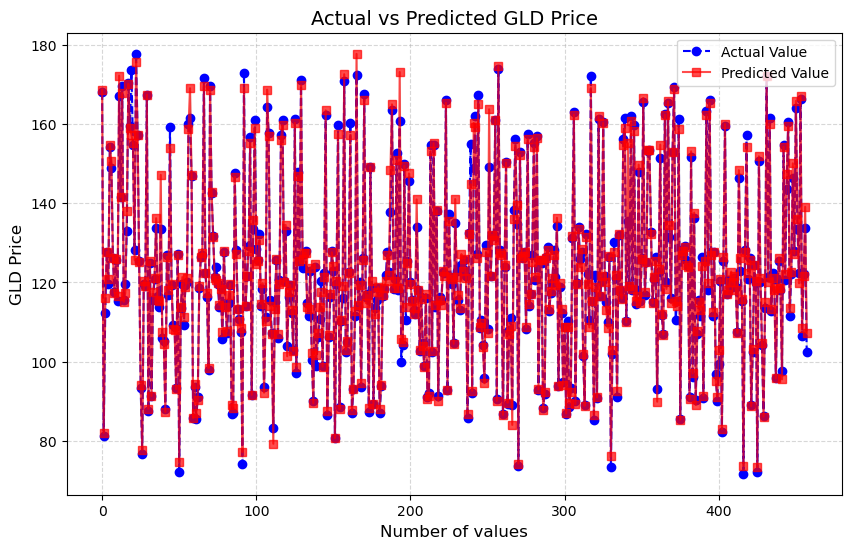

In [29]:
# Enhanced Matplotlib visualization for Actual vs Predicted Prices
plt.figure(figsize=(10, 6))  # Setting figure size
plt.plot(y_test, marker='o', linestyle='dashed', color='blue', label='Actual Value')  # Plot actual values with dashed line
plt.plot(test_data_prediction, marker='s', linestyle='solid', color='red', alpha=0.7, label='Predicted Value')  # Plot predictions with solid line
plt.fill_between(range(len(y_test)), y_test, test_data_prediction, color='gray', alpha=0.2)  # Add shaded area for error visualization
plt.title('Actual vs Predicted GLD Price', fontsize=14)  # Title
plt.xlabel('Number of values', fontsize=12)  # X-axis label
plt.ylabel('GLD Price', fontsize=12)  # Y-axis label
plt.legend()  # Show legend
plt.grid(True, linestyle='--', alpha=0.5)  # Adding light grid lines
plt.show()  # Display the plot

In [30]:
# Save